In [1]:
from SINDy import *
import numpy as np
%matplotlib inline

In [2]:
data  = np.array([[1,.2,3],[3,4,5]])
ddata = np.array([[1,2,3],[3,4,5]])

In [3]:
sindy = SINDy(data=data,polyorder=1,usesine=False,cutoff=.5)
sindy.setddata(ddata)

In [4]:
sindy.RunSINDy()

SINDy.py:81: UserWarning: The number of state symbols don't match the state dimension.
  warnings.warn("The number of state symbols don't match the state dimension.")


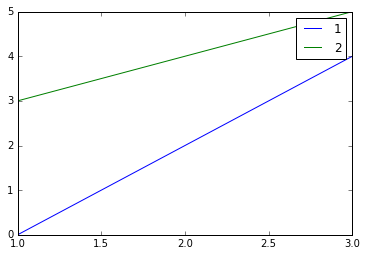

In [5]:
sindy.SINDyPlot()